In [1]:
from __future__ import division
import numpy as np
from numpy import exp
import t1t2shuffle as t1t2sh
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def numerical_gradient(myfun, myparams, e=1e-5):

    initial_params = myparams.copy()
    num_grad = np.zeros(initial_params.shape)
    perturb = np.zeros(initial_params.shape)
    
    for p in range(len(initial_params)):
        
        perturb[p] = e
        
        loss2 = myfun(myparams + perturb)
        loss1 = myfun(myparams - perturb)
        
        num_grad[p] = (loss2 - loss1) / (2 * e)
        
        perturb[p] = 0.

        return num_grad

In [3]:
def read_angles(fliptable):
    f = open(fliptable, 'r')
    angles = []
    for line in f.readlines():
        angles.append(float(line))
    f.close()
    return np.array(angles)

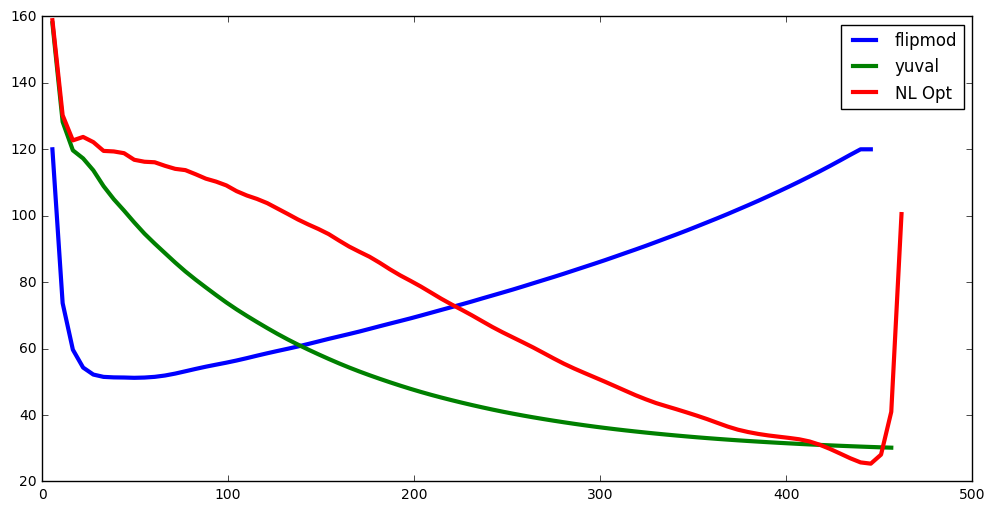

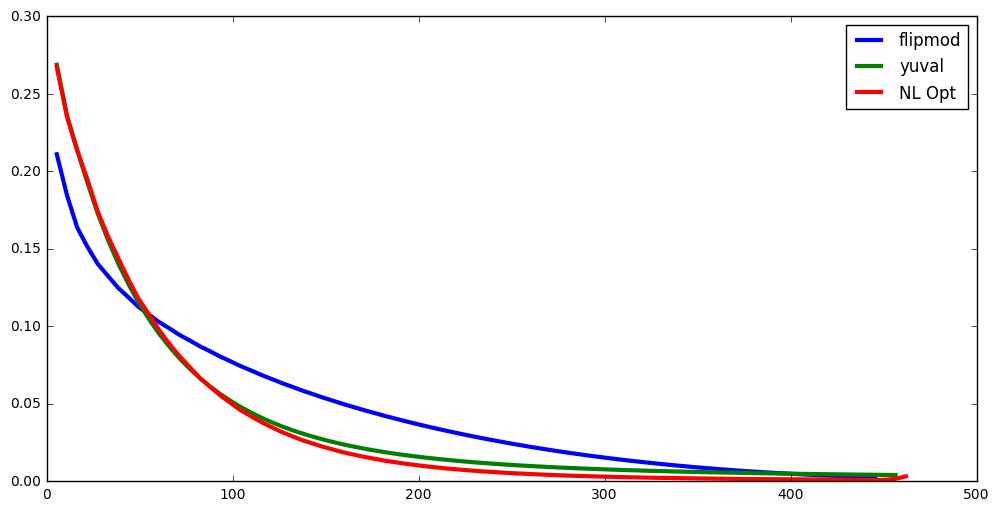

In [12]:
M0 = 1;
T1 = 2000
T2 = 100
TE = 5.5
B1 = 1

TR = 1200

def t2shuffle(angles_rad, myTE=TE, myTR=TR, myM0=M0, myT1=T1, myT2=T2, myB1=B1):
    T = len(angles_rad)
    return t1t2sh.t1t2shuffle_ex(np.pi/2, angles_rad, myTE, np.array([myTR]), myM0, myT1, myT2, myB1).reshape((T,))

def echo_times(T):
    return np.arange(TE, TE*(T+1), TE)

angle_ex_rad = np.pi / 2

# angles_rad = 120 * np.ones((T,)) * np.pi/180

angles_rad_1 = np.pi/180 * read_angles('flipangles.txt.814192544')
angles_rad_2 = np.pi/180 * read_angles('/home/jtamir/projects/t2map-notebooks_git/yuval_flip.txt')
angles_rad_3 = read_angles('/home/jtamir/projects/t2map-notebooks_git/_NLP_opt_angles_rad_T2_80_T1_1000_TE_6_T_84_TR_1200.txt')


sig_1 = t2shuffle(angles_rad_1, myT2=50)
sig_2 = t2shuffle(angles_rad_2, myT2=50)
sig_3 = t2shuffle(angles_rad_3, myT2=50)


plt.figure(figsize=(12,6))
plt.plot(echo_times(len(angles_rad_1)), angles_rad_1*180/np.pi, 
         echo_times(len(angles_rad_2)), angles_rad_2*180/np.pi, 
         echo_times(len(angles_rad_3)), angles_rad_3*180/np.pi, linewidth=3)
plt.legend(('flipmod', 'yuval', 'NL Opt'))

plt.figure(figsize=(12,6))
plt.plot(echo_times(len(sig_1)), sig_1, 
         echo_times(len(sig_2)), sig_2, 
         echo_times(len(sig_3)), sig_3, linewidth=3)
plt.legend(('flipmod', 'yuval', 'NL Opt'))
